# Analyzing Retail Sales with Python and SQL

We have a simple dataset that features information about orders (product category, date of order, price per unit) and customers (gender, age, etc.).  

We can use this to demonstrate some basic analysis for sales data.

Here are all the columns:


*   Transaction_ID - the id for a transaction, numerical
*   date_ - the date of the transaction
*   Customer_ID
*   Gender - gender of customer
*   Age - age of customer
*   Product_Category - category the product belongs to (3 categories)
*   Quantity - how much of the product was purchased in the transaction
*   Price_per_unit - price per unit of product
*   Total_Amount - price of overall transaction


We went into MySQL and queried the table to gather some quick insights.



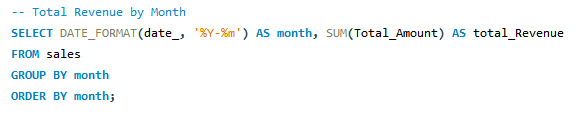
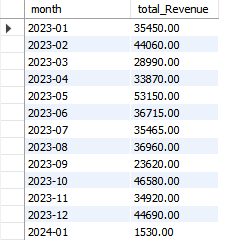

As we can see, the highest revenue was in during February, May, October, and December. The other months were steady, save for March and September. January 2024 seems uniquely low, but this could be current (incomplete) data.

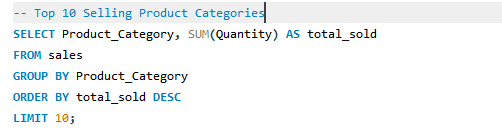 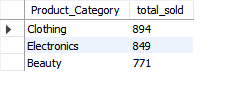

Clothing and Electronics seem to be higher than Beauty.

Now we can connect to this database here in Python to create some visualizations.




We will start by installing and importing all the necessary libraries.

In [ ]:
pip install mysql-connector-python pandas matplotlib seaborn

In [ ]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()


We will now connect to the MySQL database. (Note: this will not work in Google Colab - you should use a Python IDE like PyCharm.)

In [ ]:
db = mysql.connector.connect(
    host=os.getenv("MYSQL_HOST"),
    user=os.getenv("MYSQL_USER"),
    password=os.getenv("MYSQL_PASSWORD"),
    database="sales_analysis"
)
cursor = db.cursor()


In [ ]:
# Query: Total Revenue by Month
query = """
SELECT DATE_FORMAT(date_, '%Y-%m') AS month, SUM(Total_Amount) AS total_revenue
FROM sales
GROUP BY month
ORDER BY month;
"""
cursor.execute(query)
data = cursor.fetchall()

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Month", "Total Revenue"])

# Plot Revenue Trend
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="Month", y="Total Revenue", marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trends")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()

# Close connection
cursor.close()
db.close()

If desired, you can play around with different columns to create different visualizations.